# Loading the modules

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import LeaveOneOut, cross_val_predict, KFold
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import unique_labels


from keras import regularizers, optimizers
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from scipy.stats import skewnorm
from scipy.stats import normaltest, ttest_ind, bartlett, levene, mannwhitneyu

from matplotlib.ticker import FuncFormatter

# Create a synthetic dataset

In [2]:
length_0, length_1 = 46, 103

In [3]:
B_0 = np.random.normal(138, 20, length_0)
B_1 = np.random.normal(133, 13, length_1)
B = np.hstack([B_0, B_1])

In [4]:
C_0 = np.random.exponential(0.3, length_0)
C_1 = np.random.exponential(0.1, length_1)
C = np.hstack([C_0, C_1])

In [5]:
D_0 = np.random.normal(59, 22, length_0)
D_1 = skewnorm.rvs(5, 23, 15, length_1)

D_0 = D_0 - min(D_0)
D_0 = D_0 / max(D_0) 
D_0 = D_0 * 200

D_1 = D_1 - min(D_1)
D_1 = D_1 / max(D_1) 
D_1 = D_1 * 100

D = np.hstack([D_0, D_1])

In [6]:
H_0 = np.random.exponential(100, length_0)
H_1 = np.random.exponential(53, length_1)
H = np.hstack([H_0, H_1])

In [7]:
I_0 = np.random.gamma(2, 5, length_0)
I_1 = np.random.gamma(2, 2, length_1)
I = np.hstack([I_0, I_1])

In [8]:
J_0 = np.random.normal(8, 2, length_0)
J_1 = np.random.normal(9, 3, length_1)
J = np.hstack([J_0, J_1])

In [9]:
t_0 = np.zeros_like(J_0)
t_1 = np.ones_like(J_1)
t = np.hstack((t_0, t_1))
t = t.astype(int)

In [10]:
dataset = pd.DataFrame()
dataset['B'] = B
dataset['C'] = C
dataset['D'] = D
dataset['H'] = H
dataset['I'] = I
dataset['J'] = J
dataset['values'] = t

In [11]:
dataset.head()

,B,C,D,H,I,J,values
0,143.280620,0.436645,86.278029,317.384313,2.770929,6.997813,0
1,146.527436,0.916844,176.767350,250.792201,12.313941,5.465423,0
2,108.903103,0.522093,70.260363,20.117366,45.888120,8.977548,0
3,109.374455,0.921769,73.825653,118.645127,12.062493,9.582747,0
4,149.450821,0.361054,47.755643,0.042192,4.055596,10.390494,0


In [12]:
columnsTitles = ['B', 'C', 'D', 'H', 'I', 'J', 'values']
dataset=dataset.reindex(columns=columnsTitles)
dataset.head()

,B,C,D,H,I,J,values
0,143.280620,0.436645,86.278029,317.384313,2.770929,6.997813,0
1,146.527436,0.916844,176.767350,250.792201,12.313941,5.465423,0
2,108.903103,0.522093,70.260363,20.117366,45.888120,8.977548,0
3,109.374455,0.921769,73.825653,118.645127,12.062493,9.582747,0
4,149.450821,0.361054,47.755643,0.042192,4.055596,10.390494,0


# Descriptive Statistics

In [13]:
D_0 = dataset[dataset['values'] == 0]
D_1 = dataset[dataset['values'] == 1]

In [14]:
D_0.describe()

,B,C,D,H,I,J,values
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,137.944212,0.276147,89.650846,85.935584,11.039462,7.592422,0.0
std,15.670078,0.247558,48.810696,89.482365,9.028011,2.330720,0.0
min,101.334242,0.001849,0.000000,0.042192,1.163891,0.564185,0.0
25%,129.496181,0.067029,56.762241,22.817975,5.034618,6.086829,0.0
50%,139.762549,0.247601,79.168396,46.751434,7.969062,7.602778,0.0
75%,146.824664,0.348117,127.135870,128.870131,13.357656,9.183667,0.0
max,162.677007,0.921769,200.000000,317.384313,45.888120,12.054157,0.0


In [15]:
D_1.describe()

,B,C,D,H,I,J,values
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0
mean,132.472203,0.105846,37.198901,43.433463,4.324996,8.494032,1.0
std,12.922579,0.101447,21.901204,42.800892,2.797115,3.290669,0.0
min,106.330903,0.001106,0.000000,1.430505,0.155322,-0.432904,1.0
25%,123.048488,0.033965,19.760859,13.361220,2.280478,6.491664,1.0
50%,131.920960,0.076704,34.117993,27.638446,3.979973,8.141385,1.0
75%,140.437115,0.150444,50.963327,54.451618,5.694349,10.530657,1.0
max,170.722602,0.530157,100.000000,189.747466,14.693485,17.096850,1.0


###### D_0 normal test

In [16]:
col_list = dataset.columns.values.tolist()
print(col_list)

['B', 'C', 'D', 'H', 'I', 'J', 'values']


In [17]:
D_0_pvalue = []
for i in col_list[0:-1]:
    k2, p = normaltest(D_0[i])
    if p < 0.05:
        D_0_pvalue.append(0)
        print("The feature", i, "Reject H0 [normal distribution]")
    else:
        D_0_pvalue.append(1)
        print("The feature", i, "DO NOT reject H0 [normal distribution]")
        

print(D_0_pvalue)

The feature B DO NOT reject H0 [normal distribution]
The feature C Reject H0 [normal distribution]
The feature D DO NOT reject H0 [normal distribution]
The feature H Reject H0 [normal distribution]
The feature I Reject H0 [normal distribution]
The feature J DO NOT reject H0 [normal distribution]
[1, 0, 1, 0, 0, 1]


###### D_1 normal test

In [18]:
D_1_pvalue = []
for i in col_list[0:-1]:
    k2, p = normaltest(D_1[i])
    if p < 0.05:
        D_1_pvalue.append(0)
        print("The feature", i, "Reject H0 [normal distribution]")
    else:
        D_1_pvalue.append(1)
        print("The feature", i, "DO NOT reject H0 [normal distribution]")
        

print(D_1_pvalue)

The feature B DO NOT reject H0 [normal distribution]
The feature C Reject H0 [normal distribution]
The feature D Reject H0 [normal distribution]
The feature H Reject H0 [normal distribution]
The feature I Reject H0 [normal distribution]
The feature J DO NOT reject H0 [normal distribution]
[1, 0, 0, 0, 0, 1]


# Histogram Distributions

In [19]:
target_0 = dataset[dataset['values']==0] 
target_1 = dataset[dataset['values']==1] 

lenDataset = dataset.shape[0]
print('Number of entries in the dataset : ', lenDataset, '\n\n')

Number of entries in the dataset :  149 




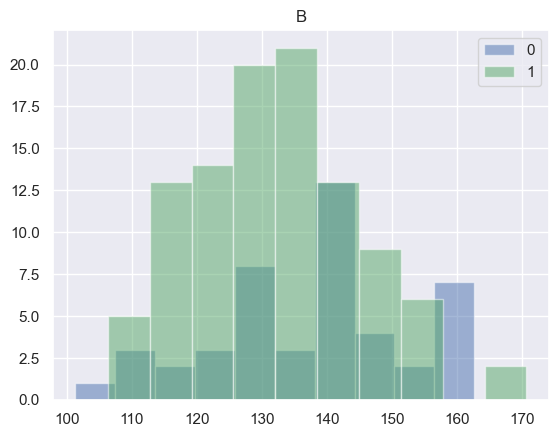

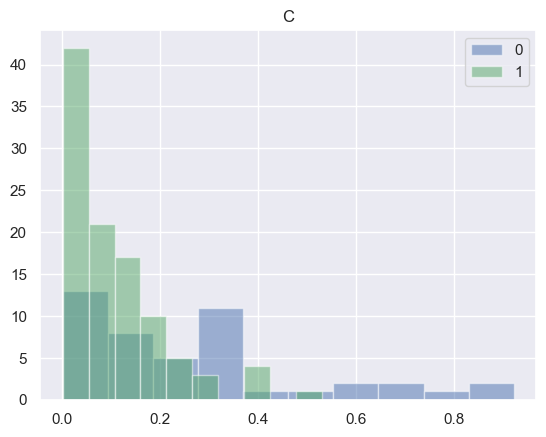

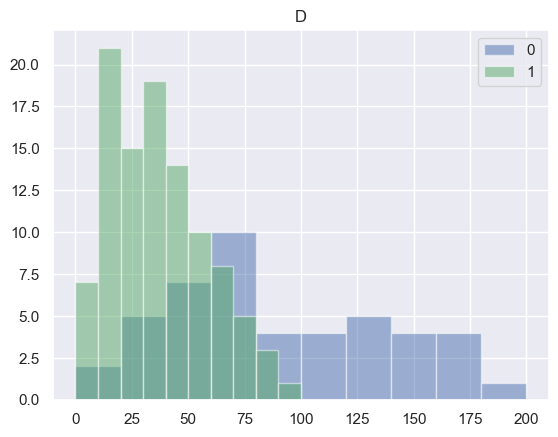

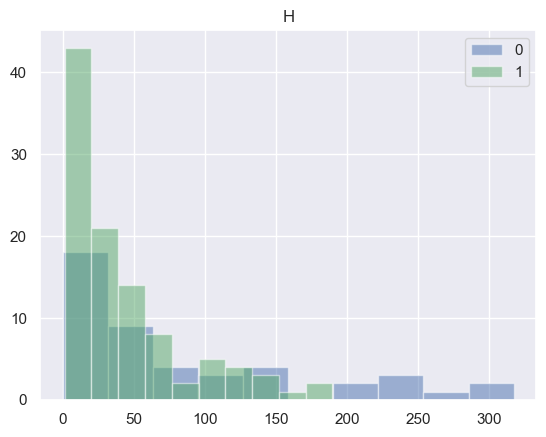

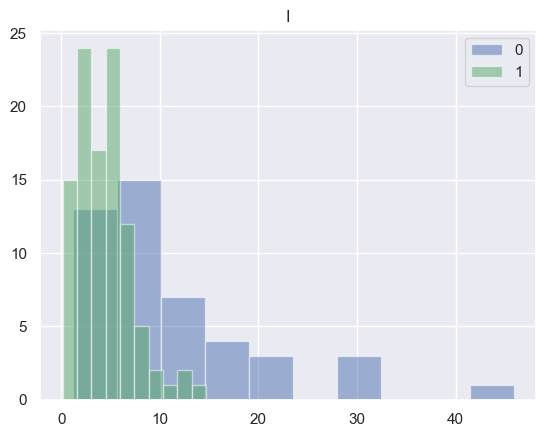

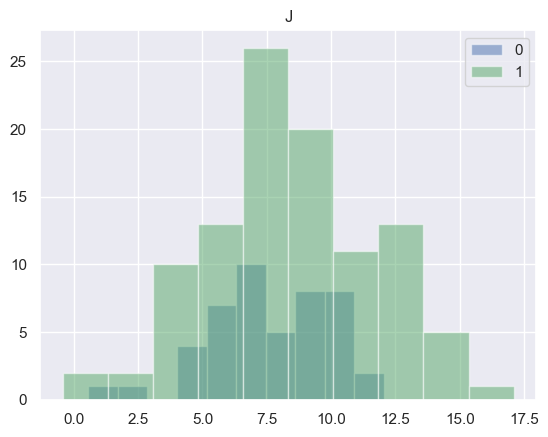

In [20]:
binsList = [10, 10, 10, 10, 10, 10]

for i in range(len(columnsTitles)-1):
    plt.figure()
    val1 = target_0[columnsTitles[i]].values
    val2 = target_1[columnsTitles[i]].values
    plt.hist(val1,bins=binsList[i],color='b',alpha=.5, label='0')
    plt.hist(val2,bins=binsList[i],color='g',alpha=.5, label='1')
    plt.title(columnsTitles[i])
    plt.legend()
    plt.show()

# Barplots for the means

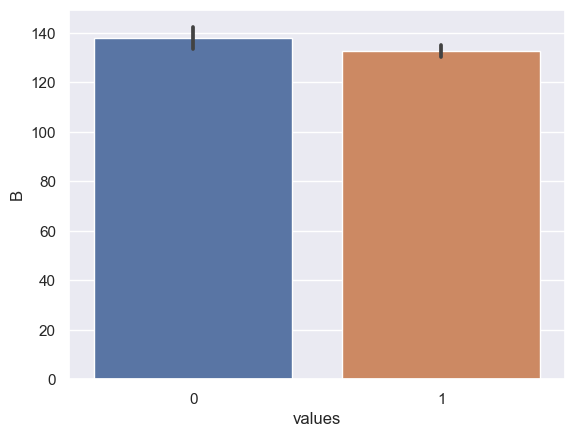

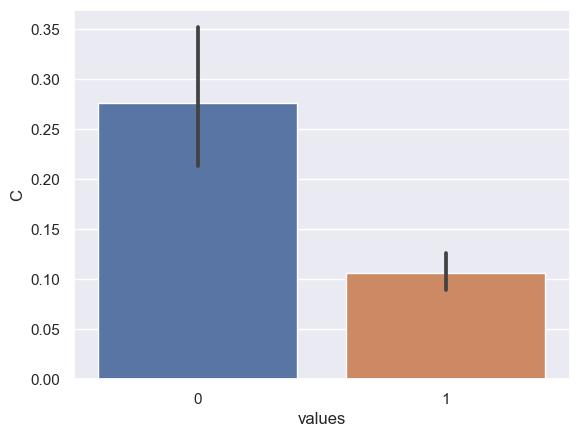

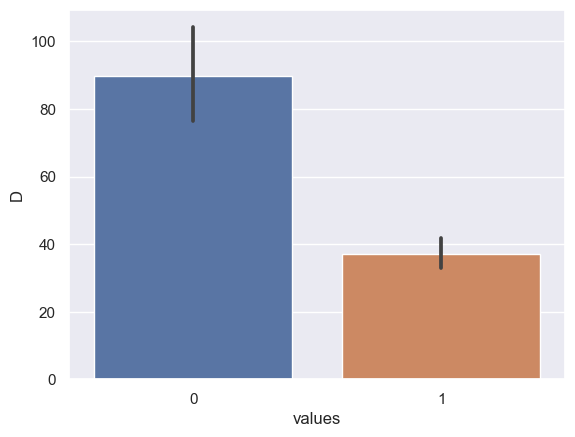

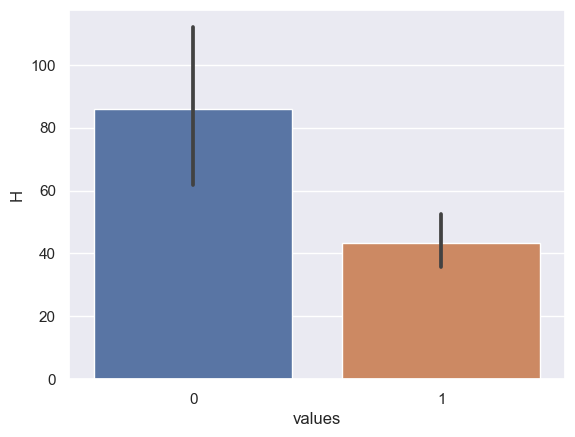

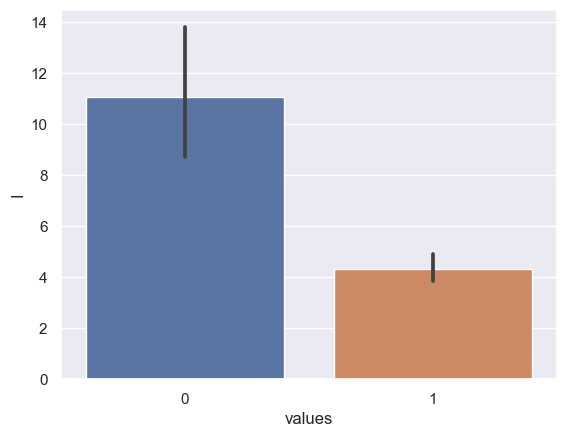

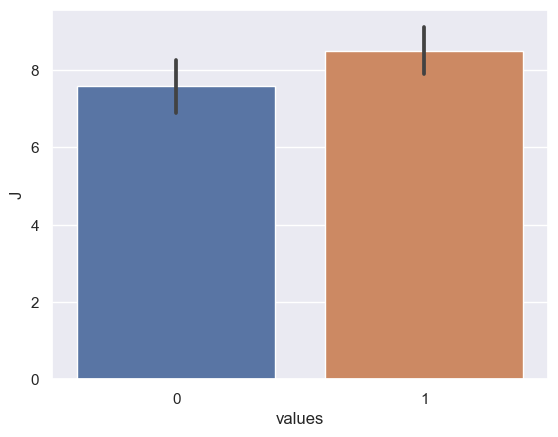

In [21]:
for i in range(len(columnsTitles)-1):
    plt.figure()
    sns.barplot(x="values", y=columnsTitles[i], data=dataset)
    plt.show()

# T test

In [22]:
index = 0
for i in D_0.columns[0:-1]:
    if D_0_pvalue[index] == 1 and D_1_pvalue[index] == 1:
        k, p = bartlett(D_0[i], D_1[i])
        if p < 0.05:
            k1, p1 = ttest_ind(D_0[i], D_1[i], equal_var=False)
        else:
            k1, p1 = ttest_ind(D_0[i], D_1[i], equal_var=True)
        if p1 < 0.05:
            print('The difference between means of feature', i, 'is statistically different \n\n')
        else:
            print('The difference between means of feature', i, 'is NOT statistically different \n\n')
    else:
        k1, p1 = mannwhitneyu(D_0[i], D_1[i], alternative='two-sided')
        if p1 < 0.05:
            print('The difference between means of feature', i, 'is statistically different \n\n')
        else:
            print('The difference between means of feature', i, 'is NOT statistically different \n\n')
    index += 1    
        
    

The difference between means of feature B is statistically different 


The difference between means of feature C is statistically different 


The difference between means of feature D is statistically different 


The difference between means of feature H is statistically different 


The difference between means of feature I is statistically different 


The difference between means of feature J is NOT statistically different 




# Pairplot Distributions

<Figure size 640x480 with 0 Axes>

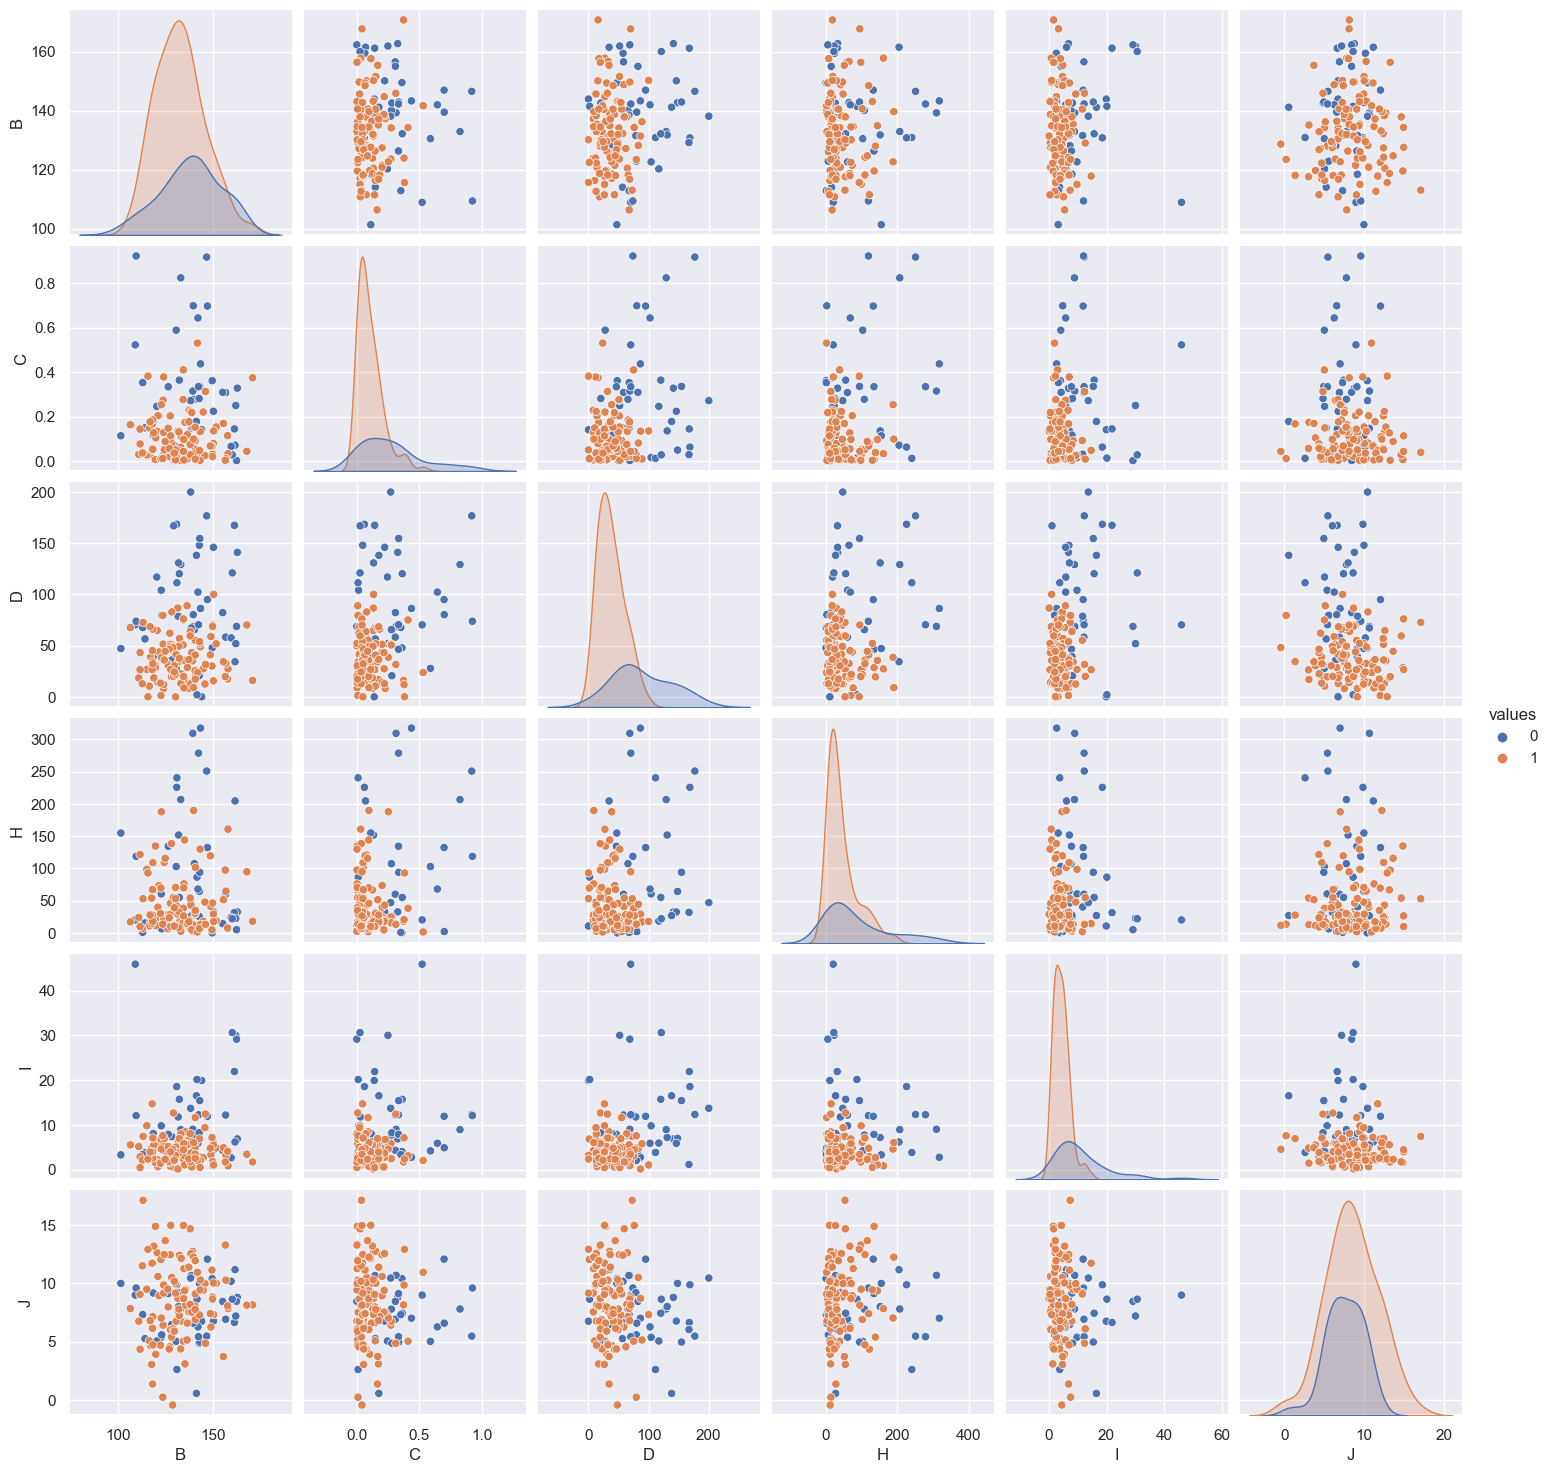

In [23]:
features = dataset.iloc[:, 0:-1]
target = dataset['values']

plt.figure()
sns.pairplot(dataset, hue = 'values')
plt.show()

# Correlation Matrix

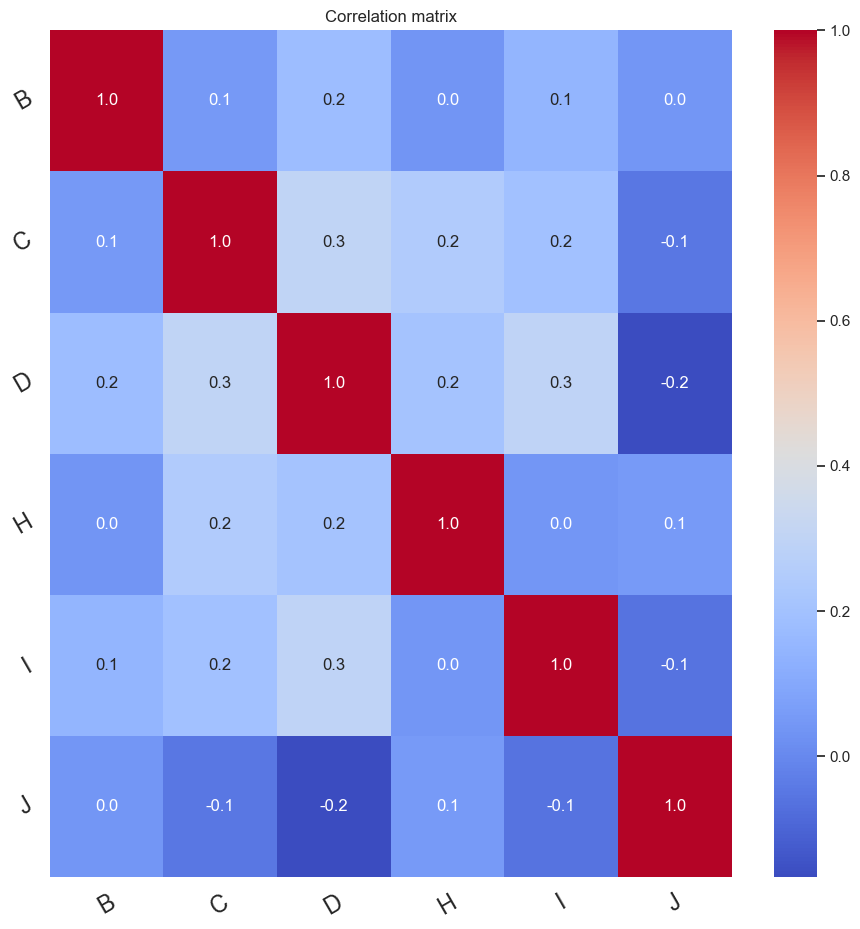

In [24]:
fig, ax = plt.subplots(figsize=(11, 11))
s = sns.heatmap(features.corr(), annot=True, fmt = '.1f', cmap='coolwarm')
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=17)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=17)
plt.title('Correlation matrix')
plt.show()

Threshold number : 137.86905387193858 for feature 0 

TN :  27 

FP :  19 

FN :  31 

TP :  72 

Sensitivity :  0.6990291262135923 

Specificity :  0.5869565217391305 

Youden value :  526 

AUC : 0.622836639932461 for B




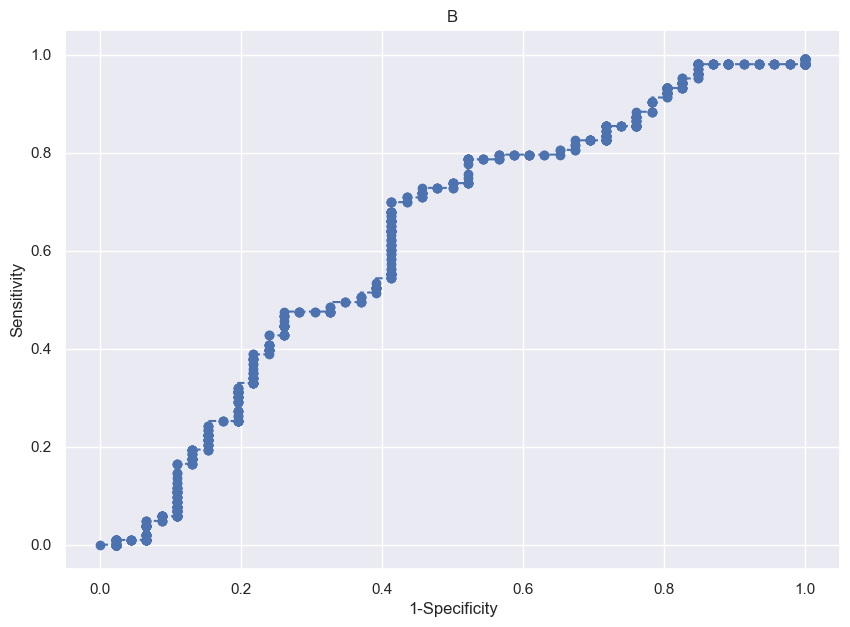

Threshold number : 0.22320820959810578 for feature 1 

TN :  25 

FP :  21 

FN :  10 

TP :  93 

Sensitivity :  0.9029126213592233 

Specificity :  0.5434782608695652 

Youden value :  241 

AUC : 0.6990291262135921 for C




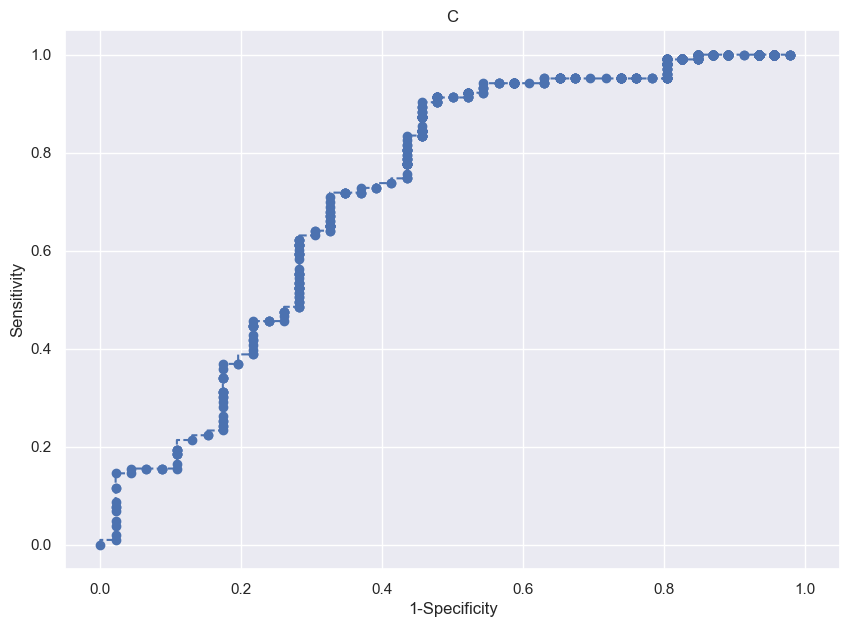

Threshold number : 55.25525525525526 for feature 2 

TN :  35 

FP :  11 

FN :  20 

TP :  83 

Sensitivity :  0.8058252427184466 

Specificity :  0.7608695652173914 

Youden value :  276 

AUC : 0.8186998733642887 for D




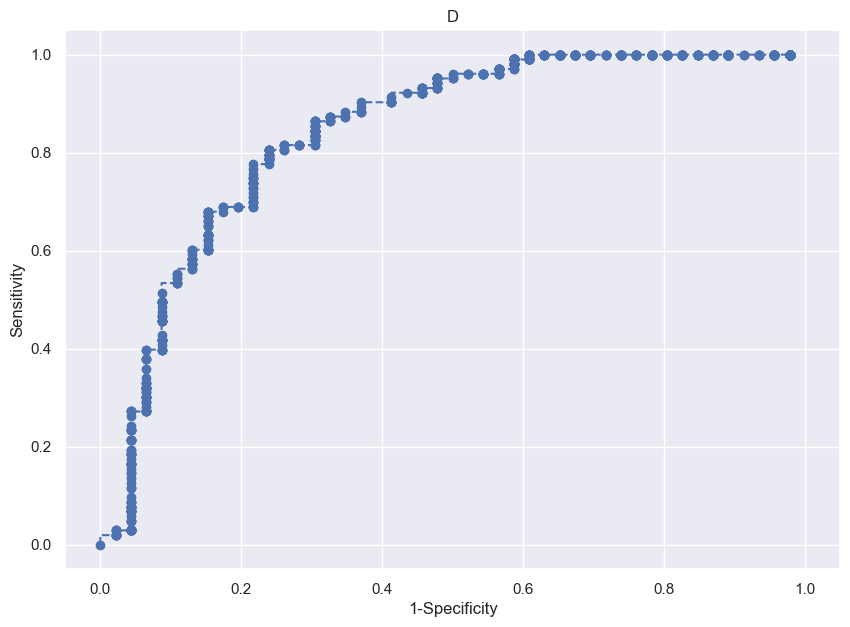

Threshold number : 54.99733382220911 for feature 3 

TN :  22 

FP :  24 

FN :  25 

TP :  78 

Sensitivity :  0.7572815533980582 

Specificity :  0.4782608695652174 

Youden value :  173 

AUC : 0.6151329674968342 for H




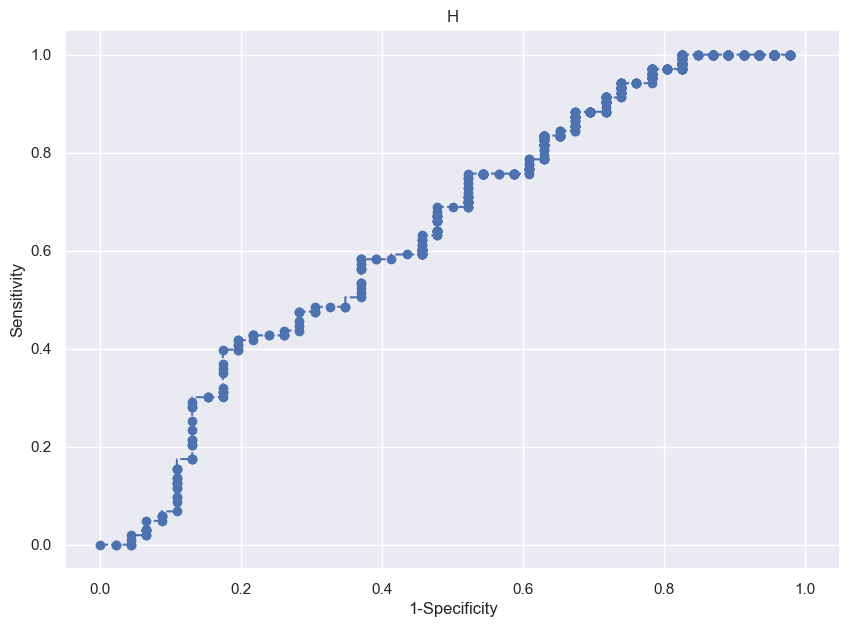

Threshold number : 5.786086901935727 for feature 4 

TN :  33 

FP :  13 

FN :  25 

TP :  78 

Sensitivity :  0.7572815533980582 

Specificity :  0.717391304347826 

Youden value :  123 

AUC : 0.7746939636977628 for I




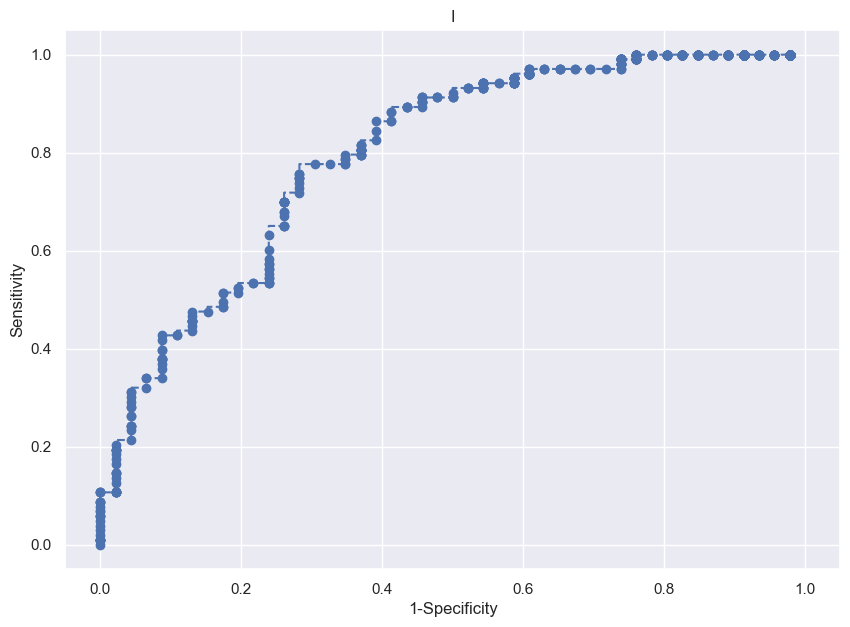

Threshold number : 4.726002433527086 for feature 5 

TN :  44 

FP :  2 

FN :  89 

TP :  14 

Sensitivity :  0.13592233009708737 

Specificity :  0.9565217391304348 

Youden value :  294 

AUC : 0.42000844238075136 for J




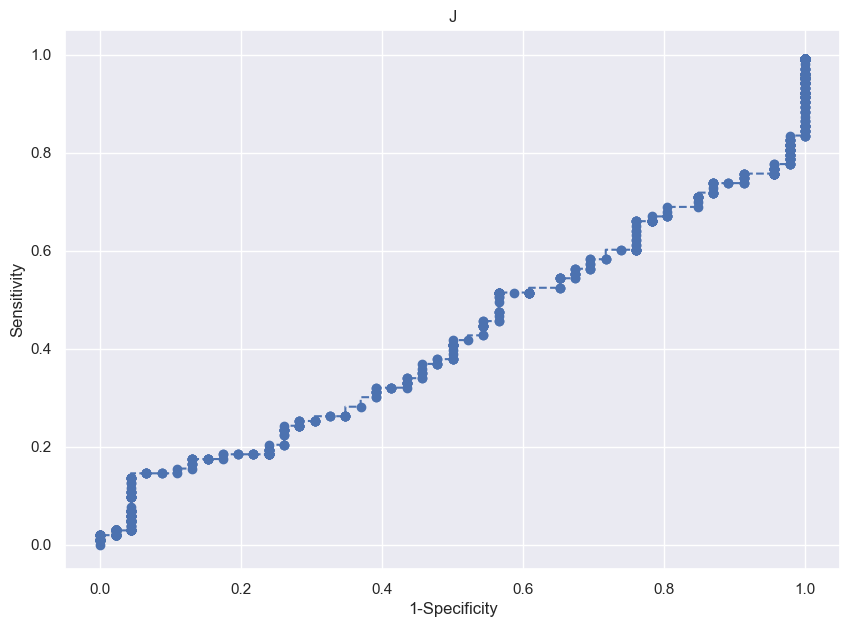

In [25]:
feat_index = np.arange(len(col_list)-1)
for nn in feat_index:
    interval = np.linspace(min(dataset[col_list[nn]]), max(dataset[col_list[nn]]), 1000)
    dataset[col_list[nn]].values

    index = 0    
    pred = {}
    for i in interval:
        pred['Threshold ' + str(index)] = []
        index += 1

    index = 0    
    for i in interval:
        for j in dataset[col_list[nn]].values:
            if j >= i:
                pred['Threshold ' + str(index)].append(0)
            else:
                pred['Threshold ' + str(index)].append(1)
        index += 1        


    x = []
    y = []
    J = []
    index = 0        
    results_pred_sensitivity = {}
    results_pred_specificity = {} 
    results_Ox_axis = {}
    for i in interval:
        results_pred_sensitivity['Threshold ' + str(index)] = []
        results_pred_specificity['Threshold ' + str(index)] = []
        results_Ox_axis['Threshold ' + str(index)] = []
        index += 1

    index = 0
    for i in interval:
        tn, fp, fn, tp = confusion_matrix(dataset[col_list[-1]].values, pred['Threshold ' + str(index)]).ravel()    
        results_pred_sensitivity['Threshold ' + str(index)] = tp / (tp+fn)
        results_pred_specificity['Threshold ' + str(index)] = tn / (tn+fp)
        results_Ox_axis['Threshold ' + str(index)] = 1 - results_pred_specificity['Threshold ' + str(index)]
        x.append(results_Ox_axis['Threshold ' + str(index)])
        y.append(results_pred_sensitivity['Threshold ' + str(index)])
        J.append(results_pred_sensitivity['Threshold ' + str(index)] + results_pred_specificity['Threshold ' + str(index)] - 1)
        index += 1

    JJ = max(J)
    index_JJ = np.argmax(J)

    index = 0
    for i in interval:
        if index == index_JJ:
            tn, fp, fn, tp = confusion_matrix(dataset[col_list[-1]].values, pred['Threshold ' + str(index)]).ravel() 
            print('Threshold number :', str(i), 'for feature', nn,'\n')
            print('TN : ', tn, '\n')
            print('FP : ', fp, '\n')
            print('FN : ', fn, '\n')
            print('TP : ', tp, '\n')
            print('Sensitivity : ', tp / (tp+fn), '\n')
            print('Specificity : ', tn / (tn+fp), '\n')
            print('Youden value : ', index_JJ, '\n')
        index += 1    
   
    x = np.array(x)
    y = np.array(y)
    
    diff_x = np.array(x[1:] - x[0:-1])
    mean_y = np.array(0.5 * ( y[1:] + y[0:-1] ))
    rez = np.dot(diff_x, mean_y)    
    print('AUC :', rez, 'for ' + col_list[nn] + '\n\n')
        

    z = x    
    plt.figure(figsize=(10,7))
    plt.step(x,y, 'bo--')
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    strTitle = col_list[nn]
    plt.title(strTitle)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.show()

    

###### We consider Decision Trees and Random Forests for 'D' and for 'C' independently

###### Accuracy using Random Trees for the whole dataset

In [26]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']

test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

In [27]:
tree_model = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_target)
tree_prediction = tree_model.predict(test_features)
print("The prediction accuracy is: ",tree_model.score(test_features,test_target)*100,"%")

The prediction accuracy is:  80.0 %


###### Accuracy using Random Trees for the dataset without 'D'

In [28]:
new_dataset_1 = dataset.drop('D', axis=1)

train_dataset_1, test_dataset_1 = train_test_split(new_dataset_1, test_size=0.2)

train_features_1 = train_dataset_1.iloc[:, 0:-1]
train_target_1 = train_dataset_1['values']

test_features_1 = test_dataset_1.iloc[:, 0:-1]
test_target_1 = test_dataset_1['values']

In [29]:
tree_model_1 = DecisionTreeClassifier(criterion = 'entropy').fit(train_features_1,train_target_1)
tree_prediction_1 = tree_model_1.predict(test_features_1)
print("The prediction accuracy without 'D' is: ",tree_model_1.score(test_features_1,test_target_1)*100,"%")

The prediction accuracy without 'D' is:  80.0 %


###### Accuracy using Random Trees for the dataset without 'C'

In [30]:
new_dataset_2 = dataset.drop('C', axis=1)

train_dataset_2, test_dataset_2 = train_test_split(new_dataset_2, test_size=0.2)

train_features_2 = train_dataset_2.iloc[:, 0:-1]
train_target_2 = train_dataset_2['values']

test_features_2 = test_dataset_2.iloc[:, 0:-1]
test_target_2 = test_dataset_2['values']

In [31]:
tree_model_2 = DecisionTreeClassifier(criterion = 'entropy').fit(train_features_2,train_target_2)
tree_prediction_2 = tree_model_2.predict(test_features_2)
print("The prediction accuracy without 'C' is: ",tree_model_2.score(test_features_2,test_target_2)*100,"%")

The prediction accuracy without 'C' is:  76.66666666666667 %


###### Accuracy using Random Forests and Random Grid Search for the whole dataset

In [32]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50, 60],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [33]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']

test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

In [34]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

rf_model = grid_search.fit(train_features, train_target)

print('GRID SEARCH BEST PARAMETERS : \n\n', grid_search.best_params_, '\n\n')
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
GRID SEARCH BEST PARAMETERS : 

 {'bootstrap': True, 'max_depth': 60, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100} 




In [35]:
rf_prediction = grid_search.predict(test_features)
print("The prediction accuracy is: ",rf_model.score(test_features,test_target)*100,"%")

The prediction accuracy is:  63.75921894915457 %


###### Based upon numerous simulations with Random Forest using bootstraping and taking into account the maximum number of features => we try to apply RFE, PCA and then LDA techniques

###### Apply RFE on Logistic Regression model

In [36]:
LR_model = LogisticRegression()
rfe = RFE(LR_model, n_features_to_select = 3)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']
test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

fit = rfe.fit(train_features, train_target)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  3
Selected Features:  [False  True  True False  True False]
Feature Ranking:  [4 1 1 3 1 2]


###### Apply RFE on Decision Tree model

In [37]:
tree_model = DecisionTreeClassifier(criterion = 'entropy')
rfe = RFE(tree_model, n_features_to_select=3)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']
test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

fit = rfe.fit(train_features, train_target)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  3
Selected Features:  [False  True  True False  True False]
Feature Ranking:  [2 1 1 3 1 4]


###### Dropping the 1st and the last features

In [38]:
new_dataset = dataset.drop('B', axis=1)
new_dataset = dataset.drop('J', axis=1)
new_dataset.head()

train_dataset, test_dataset = train_test_split(new_dataset, test_size=0.2)
train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']
test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

###### Apply PCA technique on the new dataset

Number of relevant principal components : 5 

Variances :  [0.33988463 0.21387053 0.19118754 0.13169045 0.12336685] 



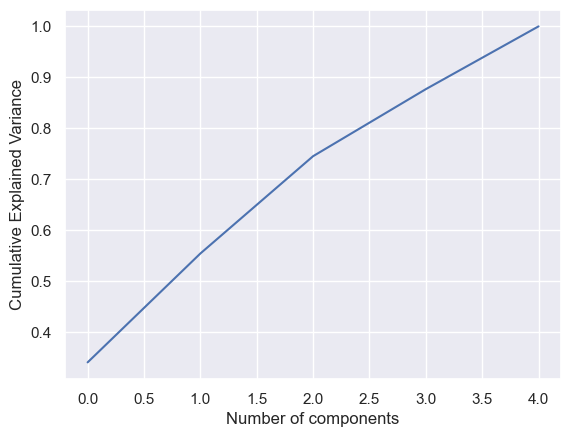

In [39]:
train_features_scaled = StandardScaler().fit_transform(train_features)
pca = PCA(.90)
pca.fit(train_features_scaled)
print('Number of relevant principal components :', pca.n_components_, '\n')

train_features_pca = pca.transform(train_features_scaled) 

ex_variance = np.var(train_features_pca, axis=0)
ex_variance_ratio = pca.explained_variance_ratio_
print('Variances : ', ex_variance_ratio, '\n')

plt.figure()
plt.plot(np.cumsum(ex_variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

###### Apply Extra Trees Classifier, if PCA has no effect

In [40]:
new_dataset = dataset.drop('B', axis=1)
new_dataset = dataset.drop('J', axis=1)
new_dataset.head()

train_dataset, test_dataset = train_test_split(new_dataset, test_size=0.2)
train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']
test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

ETC_model = ExtraTreesClassifier()
ETC_model.fit(train_features, train_target)
print('Feature importance : \n', ETC_model.feature_importances_, '\n\n')

Feature importance : 
 [0.12646959 0.19477717 0.32594352 0.15329483 0.1995149 ] 




###### Apply LDA technique

In [41]:
new_dataset = dataset.drop('B', axis=1)
new_dataset = dataset.drop('J', axis=1)
new_dataset.head()

train_dataset, test_dataset = train_test_split(new_dataset, test_size=0.2)
train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']
test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

sklearn_lda = LDA()
sklearn_lda.fit_transform(train_features, train_target)

print("The prediction accuracy is: ",sklearn_lda.score(test_features, test_target)*100,"%")

The prediction accuracy is:  96.66666666666667 %


###### The original dataset without 'D' and 'C'

In [42]:
new_dataset = dataset.drop(['D', 'C'], axis=1)
new_dataset.columns

Index(['B', 'H', 'I', 'J', 'values'], dtype='object')

###### LDA on the new dataset

In [43]:
train_dataset, test_dataset = train_test_split(new_dataset, test_size=0.2)
train_features = train_dataset.iloc[:, 0:-1]
train_target = train_dataset['values']
test_features = test_dataset.iloc[:, 0:-1]
test_target = test_dataset['values']

sklearn_lda = LDA()
sklearn_lda.fit_transform(train_features, train_target)

print("The prediction accuracy is: ",sklearn_lda.score(test_features, test_target)*100,"%")

The prediction accuracy is:  80.0 %


###### Confusion matrix function from sklearn

<Figure size 640x480 with 0 Axes>

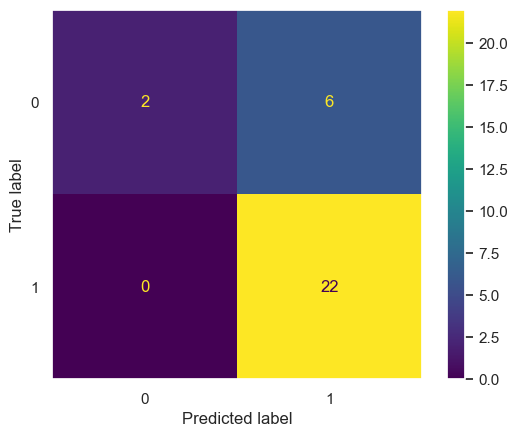

In [44]:
class_names = np.array(['0', '1']) 
test_pred = sklearn_lda.predict(test_features)

plt.figure()
cmf = confusion_matrix(test_target, test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmf)
cm_display.plot()
plt.grid(False)
plt.show()

###### Cross-Validation with LDA on the new dataset

In [45]:
features = new_dataset.iloc[:, 0:-1]
target = new_dataset['values']

<Figure size 640x480 with 0 Axes>

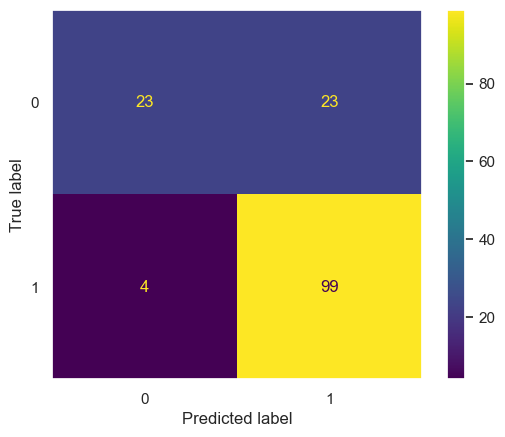

The prediction accuracy is:  83.33333333333334 %


In [46]:
cv = LeaveOneOut()


sklearn_lda = LDA()
sklearn_lda.fit_transform(features, target)


class_names = np.array(['Dysfunctional', 'Functional']) 
test_pred = cross_val_predict(sklearn_lda, features, target, cv=cv)

plt.figure()
cmf = confusion_matrix(target, test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmf)
cm_display.plot()
plt.grid(False)
plt.show()

print("The prediction accuracy is: ",sklearn_lda.score(test_features, test_target)*100,"%")

######  Cross-Validation with Logistic Regression

<Figure size 640x480 with 0 Axes>

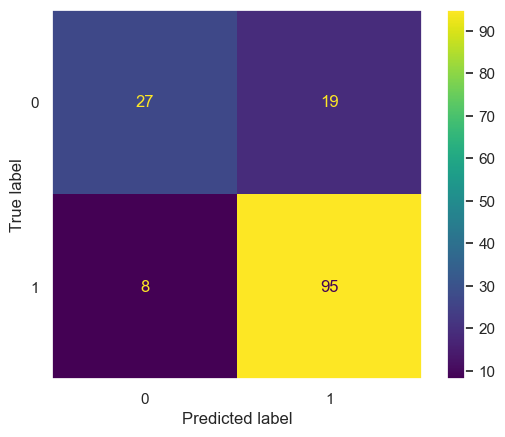

In [47]:
cv = LeaveOneOut()

LR = LogisticRegression()
LR.fit(features, target)


class_names = np.array(['Dysfunctional', 'Functional']) 
test_pred = cross_val_predict(LR, features, target, cv=cv)

plt.figure()
cmf = confusion_matrix(target, test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmf)
cm_display.plot()
plt.grid(False)
plt.show()

# Neural Network

######  Optimization Parameters

In [48]:
epochs = 1000
learningRate = 1e-1
momentum = 0.9
batchSize = 10

###### Structure of the DNN

In [49]:
features = new_dataset.iloc[:, 0:-1]
target = new_dataset['values']

N = len(features.columns)


X = features.values
y = target.values

cvscores = [[], [], [], []]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=2, shuffle=True)

for train, test in kfold.split(X_scale, y):
    def buildModel_DNN(dropout_rate=0.5, decay_rate=0.0):
    
        model = Sequential([
            Dense(32, activation='relu', input_shape=(N,)),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation='sigmoid'),
        ])
    
        DNN_optimizer = optimizers.SGD(learning_rate=learningRate, momentum=momentum, nesterov=True, decay=decay_rate)
    
        model.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
        return model

    DNN_model = buildModel_DNN()
    history = DNN_model.fit(X_scale, y, epochs=epochs, batch_size=batchSize, verbose=False)
    
    y_pred = np.round(DNN_model.predict(X_scale))
    
    accuracy = 100 * accuracy_score(y, y_pred)
    precision = 100 * precision_score(y, y_pred)
    recall = 100 * recall_score(y, y_pred)
    roc = 100 * roc_auc_score(y, y_pred)
    
    cvscores[0].append(accuracy)
    cvscores[1].append(precision)
    cvscores[2].append(recall)
    cvscores[3].append(roc)
    
    print('Accuracy : {} ....... Precision : {} ....... Recall : {} ........... ROC : {}'.format(accuracy,precision,recall,roc))
    print('Confusion matrix : \n', confusion_matrix(y, y_pred), '\n\n')
    

print("Final Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[0]), np.std(cvscores[0])))
print("Final Precision : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[1]), np.std(cvscores[1])))
print("Final Recall : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[2]), np.std(cvscores[2])))
print("Final ROC : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[3]), np.std(cvscores[3])))

5/5 [==============================] - 0s 2ms/step
Accuracy : 86.57718120805369 ....... Precision : 83.73983739837398 ....... Recall : 100.0 ........... ROC : 78.26086956521739
Confusion matrix : 
 [[ 26  20]
 [  0 103]] 


5/5 [==============================] - 0s 2ms/step
Accuracy : 85.90604026845638 ....... Precision : 83.06451612903226 ....... Recall : 100.0 ........... ROC : 77.17391304347827
Confusion matrix : 
 [[ 25  21]
 [  0 103]] 


Final Accuracy : 86.24% (+/- 0.34%)
Final Precision : 83.40% (+/- 0.34%)
Final Recall : 100.00% (+/- 0.00%)
Final ROC : 77.72% (+/- 0.54%)


###### DNN without 'C'

In [50]:
new_dataset = dataset.drop(['C'], axis=1)


features = new_dataset.iloc[:, 0:-1]
target = new_dataset['values']

N = len(features.columns)

X = features.values
y = target.values

cvscores = [[], [], [], []]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=2, shuffle=True)

for train, test in kfold.split(X_scale, y):
    def buildModel_DNN(dropout_rate=0.5, decay_rate=0.0):
    
        model = Sequential([
            Dense(32, activation='relu', input_shape=(N,)),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation='sigmoid'),
        ])
    
        DNN_optimizer = optimizers.SGD(learning_rate=learningRate, momentum=momentum, nesterov=True, decay=decay_rate)
    
        model.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
        return model

    DNN_model = buildModel_DNN()
    history = DNN_model.fit(X_scale, y, epochs=epochs, batch_size=batchSize, verbose=False)
    
    y_pred = np.round(DNN_model.predict(X_scale))
    
    accuracy = 100 * accuracy_score(y, y_pred)
    precision = 100 * precision_score(y, y_pred)
    recall = 100 * recall_score(y, y_pred)
    roc = 100 * roc_auc_score(y, y_pred)
    
    cvscores[0].append(accuracy)
    cvscores[1].append(precision)
    cvscores[2].append(recall)
    cvscores[3].append(roc)
    
    print('Accuracy : {} ....... Precision : {} ....... Recall : {} ........... ROC : {}'.format(accuracy,precision,recall,roc))
    print('Confusion matrix : \n', confusion_matrix(y, y_pred), '\n\n')
    

print("Final Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[0]), np.std(cvscores[0])))
print("Final Precision : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[1]), np.std(cvscores[1])))
print("Final Recall : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[2]), np.std(cvscores[2])))
print("Final ROC : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[3]), np.std(cvscores[3])))

5/5 [==============================] - 0s 3ms/step
Accuracy : 91.94630872483222 ....... Precision : 89.56521739130436 ....... Recall : 100.0 ........... ROC : 86.95652173913044
Confusion matrix : 
 [[ 34  12]
 [  0 103]] 


5/5 [==============================] - 0s 1ms/step
Accuracy : 91.2751677852349 ....... Precision : 88.79310344827587 ....... Recall : 100.0 ........... ROC : 85.86956521739131
Confusion matrix : 
 [[ 33  13]
 [  0 103]] 


Final Accuracy : 91.61% (+/- 0.34%)
Final Precision : 89.18% (+/- 0.39%)
Final Recall : 100.00% (+/- 0.00%)
Final ROC : 86.41% (+/- 0.54%)


###### DNN without 'D'

In [51]:
new_dataset = dataset.drop(['D'], axis=1)


features = new_dataset.iloc[:, 0:-1]
target = new_dataset['values']

N = len(features.columns)

X = features.values
y = target.values

cvscores = [[], [], [], []]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=2, shuffle=True)

for train, test in kfold.split(X_scale, y):
    def buildModel_DNN(dropout_rate=0.5, decay_rate=0.0):
    
        model = Sequential([
            Dense(32, activation='relu', input_shape=(N,)),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation='sigmoid'),
        ])
    
        DNN_optimizer = optimizers.SGD(learning_rate=learningRate, momentum=momentum, nesterov=True, decay=decay_rate)
    
        model.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
        return model

    DNN_model = buildModel_DNN()
    history = DNN_model.fit(X_scale, y, epochs=epochs, batch_size=batchSize, verbose=False)
    
    y_pred = np.round(DNN_model.predict(X_scale))
    
    accuracy = 100 * accuracy_score(y, y_pred)
    precision = 100 * precision_score(y, y_pred)
    recall = 100 * recall_score(y, y_pred)
    roc = 100 * roc_auc_score(y, y_pred)
    
    cvscores[0].append(accuracy)
    cvscores[1].append(precision)
    cvscores[2].append(recall)
    cvscores[3].append(roc)
    
    print('Accuracy : {} ....... Precision : {} ....... Recall : {} ........... ROC : {}'.format(accuracy,precision,recall,roc))
    print('Confusion matrix : \n', confusion_matrix(y, y_pred), '\n\n')
    

print("Final Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[0]), np.std(cvscores[0])))
print("Final Precision : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[1]), np.std(cvscores[1])))
print("Final Recall : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[2]), np.std(cvscores[2])))
print("Final ROC : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[3]), np.std(cvscores[3])))

5/5 [==============================] - 0s 2ms/step
Accuracy : 88.59060402684564 ....... Precision : 85.83333333333333 ....... Recall : 100.0 ........... ROC : 81.5217391304348
Confusion matrix : 
 [[ 29  17]
 [  0 103]] 


5/5 [==============================] - 0s 3ms/step
Accuracy : 87.91946308724832 ....... Precision : 85.12396694214877 ....... Recall : 100.0 ........... ROC : 80.43478260869566
Confusion matrix : 
 [[ 28  18]
 [  0 103]] 


Final Accuracy : 88.26% (+/- 0.34%)
Final Precision : 85.48% (+/- 0.35%)
Final Recall : 100.00% (+/- 0.00%)
Final ROC : 80.98% (+/- 0.54%)


###### Full DNN

In [52]:
features = dataset.iloc[:, 0:-1]
target = dataset['values']

N = len(features.columns)

X = features.values
y = target.values

cvscores = [[], [], [], []]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=2, shuffle=True)

for train, test in kfold.split(X_scale, y):
    def buildModel_DNN(dropout_rate=0.5, decay_rate=0.0):
    
        model = Sequential([
            Dense(32, activation='relu', input_shape=(N,)),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation='sigmoid'),
        ])
    
        DNN_optimizer = optimizers.SGD(learning_rate=learningRate, momentum=momentum, nesterov=True, decay=decay_rate)
    
        model.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
        return model

    DNN_model = buildModel_DNN()
    history = DNN_model.fit(X_scale, y, epochs=epochs, batch_size=batchSize, verbose=False)
    
    y_pred = np.round(DNN_model.predict(X_scale))
    
    accuracy = 100 * accuracy_score(y, y_pred)
    precision = 100 * precision_score(y, y_pred)
    recall = 100 * recall_score(y, y_pred)
    roc = 100 * roc_auc_score(y, y_pred)
    
    cvscores[0].append(accuracy)
    cvscores[1].append(precision)
    cvscores[2].append(recall)
    cvscores[3].append(roc)
    
    print('Accuracy : {} ....... Precision : {} ....... Recall : {} ........... ROC : {}'.format(accuracy,precision,recall,roc))
    print('Confusion matrix : \n', confusion_matrix(y, y_pred), '\n\n')
    

print("Final Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[0]), np.std(cvscores[0])))
print("Final Precision : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[1]), np.std(cvscores[1])))
print("Final Recall : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[2]), np.std(cvscores[2])))
print("Final ROC : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[3]), np.std(cvscores[3])))

5/5 [==============================] - 0s 1ms/step
Accuracy : 93.28859060402685 ....... Precision : 91.1504424778761 ....... Recall : 100.0 ........... ROC : 89.1304347826087
Confusion matrix : 
 [[ 36  10]
 [  0 103]] 


5/5 [==============================] - 0s 1ms/step
Accuracy : 84.56375838926175 ....... Precision : 81.74603174603175 ....... Recall : 100.0 ........... ROC : 75.0
Confusion matrix : 
 [[ 23  23]
 [  0 103]] 


Final Accuracy : 88.93% (+/- 4.36%)
Final Precision : 86.45% (+/- 4.70%)
Final Recall : 100.00% (+/- 0.00%)
Final ROC : 82.07% (+/- 7.07%)


###### DNN without 'B'

In [53]:
new_dataset = dataset.drop(['B'], axis=1)


features = new_dataset.iloc[:, 0:-1]
target = new_dataset['values']

N = len(features.columns)

X = features.values
y = target.values

cvscores = [[], [], [], []]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=2, shuffle=True)

for train, test in kfold.split(X_scale, y):
    def buildModel_DNN(dropout_rate=0.5, decay_rate=0.0):
    
        model = Sequential([
            Dense(32, activation='relu', input_shape=(N,)),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation='sigmoid'),
        ])
    
        DNN_optimizer = optimizers.SGD(learning_rate=learningRate, momentum=momentum, nesterov=True, decay=decay_rate)
    
        model.compile(loss='binary_crossentropy', optimizer=DNN_optimizer, metrics=['accuracy', 'mean_squared_error'])
    
        return model

    DNN_model = buildModel_DNN()
    history = DNN_model.fit(X_scale, y, epochs=epochs, batch_size=batchSize, verbose=False)
    
    y_pred = np.round(DNN_model.predict(X_scale))
    
    accuracy = 100 * accuracy_score(y, y_pred)
    precision = 100 * precision_score(y, y_pred)
    recall = 100 * recall_score(y, y_pred)
    roc = 100 * roc_auc_score(y, y_pred)
    
    cvscores[0].append(accuracy)
    cvscores[1].append(precision)
    cvscores[2].append(recall)
    cvscores[3].append(roc)
    
    print('Accuracy : {} ....... Precision : {} ....... Recall : {} ........... ROC : {}'.format(accuracy,precision,recall,roc))
    print('Confusion matrix : \n', confusion_matrix(y, y_pred), '\n\n')
    

print("Final Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[0]), np.std(cvscores[0])))
print("Final Precision : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[1]), np.std(cvscores[1])))
print("Final Recall : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[2]), np.std(cvscores[2])))
print("Final ROC : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[3]), np.std(cvscores[3])))

5/5 [==============================] - 0s 1ms/step
Accuracy : 91.2751677852349 ....... Precision : 91.66666666666666 ....... Recall : 96.11650485436894 ........... ROC : 88.2756437315323
Confusion matrix : 
 [[37  9]
 [ 4 99]] 


5/5 [==============================] - 0s 1ms/step
Accuracy : 93.28859060402685 ....... Precision : 91.1504424778761 ....... Recall : 100.0 ........... ROC : 89.1304347826087
Confusion matrix : 
 [[ 36  10]
 [  0 103]] 


Final Accuracy : 92.28% (+/- 1.01%)
Final Precision : 91.41% (+/- 0.26%)
Final Recall : 98.06% (+/- 1.94%)
Final ROC : 88.70% (+/- 0.43%)
